In [9]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [10]:
data_folder = r"E:\data\gst-0525\FoolingT"

t30_performance_file = data_folder + r"\t_performance_across_K_E_30"
t30_cog_performance_file = data_folder + r"\t_cog_performance_across_K_time_E_30"
t30_variance_file = data_folder + r"\t_variance_across_K_E_30"
t30_performance_time_file = data_folder + r"\t_performance_across_K_time_E_30"

t32_performance_file = data_folder + r"\t_performance_across_K_E_32"
t32_cog_performance_file = data_folder + r"\t_cog_performance_across_K_time_E_32"
t32_variance_file = data_folder + r"\t_variance_across_K_E_32"
t32_performance_time_file = data_folder + r"\t_performance_across_K_time_E_32"

t34_performance_file = data_folder + r"\t_performance_across_K_E_34"
t34_cog_performance_file = data_folder + r"\t_cog_performance_across_K_time_E_34"
t34_variance_file = data_folder + r"\t_variance_across_K_E_34"
t34_performance_time_file = data_folder + r"\t_performance_across_K_time_E_34"

t36_performance_file = data_folder + r"\t_performance_across_K_E_36"
t36_cog_performance_file = data_folder + r"\t_cog_performance_across_K_time_E_36"
t36_variance_file = data_folder + r"\t_variance_across_K_E_36"
t36_performance_time_file = data_folder + r"\t_performance_across_K_time_E_36"

t38_performance_file = data_folder + r"\t_performance_across_K_E_38"
t38_cog_performance_file = data_folder + r"\t_cog_performance_across_K_time_E_38"
t38_variance_file = data_folder + r"\t_variance_across_K_E_38"
t38_performance_time_file = data_folder + r"\t_performance_across_K_time_E_38"

t40_performance_file = data_folder + r"\t_performance_across_K_E_40"
t40_cog_performance_file = data_folder + r"\t_cog_performance_across_K_time_E_40"
t40_variance_file = data_folder + r"\t_variance_across_K_E_40"
t40_performance_time_file = data_folder + r"\t_performance_across_K_time_E_40"

with open(t30_performance_file, 'rb') as infile:
    t30_fitness = pickle.load(infile)
with open(t30_cog_performance_file, 'rb') as infile:
    t30_cog_fitness = pickle.load(infile)
with open(t30_variance_file, 'rb') as infile:
    t30_variance = pickle.load(infile)
with open(t30_performance_time_file, 'rb') as infile:
    t30_performance_time = pickle.load(infile)

with open(t32_performance_file, 'rb') as infile:
    t32_fitness = pickle.load(infile)
with open(t32_cog_performance_file, 'rb') as infile:
    t32_cog_fitness = pickle.load(infile)
with open(t32_variance_file, 'rb') as infile:
    t32_variance = pickle.load(infile)
with open(t32_performance_time_file, 'rb') as infile:
    t32_performance_time = pickle.load(infile)

with open(t34_performance_file, 'rb') as infile:
    t34_fitness = pickle.load(infile)
with open(t34_cog_performance_file, 'rb') as infile:
    t34_cog_fitness = pickle.load(infile)
with open(t34_variance_file, 'rb') as infile:
    t34_variance = pickle.load(infile)
with open(t34_performance_time_file, 'rb') as infile:
    t34_performance_time = pickle.load(infile)

with open(t36_performance_file, 'rb') as infile:
    t36_fitness = pickle.load(infile)
with open(t36_cog_performance_file, 'rb') as infile:
    t36_cog_fitness = pickle.load(infile)
with open(t36_variance_file, 'rb') as infile:
    t36_variance = pickle.load(infile)
with open(t36_performance_time_file, 'rb') as infile:
    t36_performance_time = pickle.load(infile)

with open(t38_performance_file, 'rb') as infile:
    t38_fitness = pickle.load(infile)
with open(t38_cog_performance_file, 'rb') as infile:
    t38_cog_fitness = pickle.load(infile)
with open(t38_variance_file, 'rb') as infile:
    t38_variance = pickle.load(infile)
with open(t38_performance_time_file, 'rb') as infile:
    t38_performance_time = pickle.load(infile)

with open(t40_performance_file, 'rb') as infile:
    t40_fitness = pickle.load(infile)
with open(t40_cog_performance_file, 'rb') as infile:
    t40_cog_fitness = pickle.load(infile)
with open(t40_variance_file, 'rb') as infile:
    t40_variance = pickle.load(infile)
with open(t40_performance_time_file, 'rb') as infile:
    t40_performance_time = pickle.load(infile)

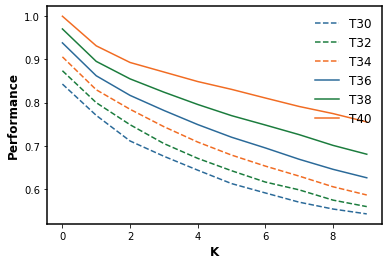

In [11]:
# GST Fitness
x = range(len(t30_fitness))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, t30_fitness, "k--", label="T30", color=nature_blue)
plt.plot(x, t32_fitness, "k--", label="T32", color=nature_green)
plt.plot(x, t34_fitness, "k--", label="T34", color=nature_orange)
plt.plot(x, t36_fitness, "k-", label="T36", color=nature_blue)
plt.plot(x, t38_fitness, "k-", label="T38", color=nature_green)
plt.plot(x, t40_fitness, "k-", label="T40", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Ts_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

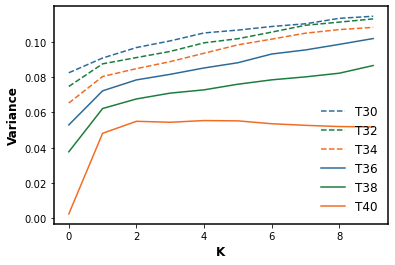

In [12]:
# GST Fitness
x = range(len(t30_fitness))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, t30_variance, "k--", label="T30", color=nature_blue)
plt.plot(x, t32_variance, "k--", label="T32", color=nature_green)
plt.plot(x, t34_variance, "k--", label="T34", color=nature_orange)
plt.plot(x, t36_variance, "k-", label="T36", color=nature_blue)
plt.plot(x, t38_variance, "k-", label="T38", color=nature_green)
plt.plot(x, t40_variance, "k-", label="T40", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Ts_variance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

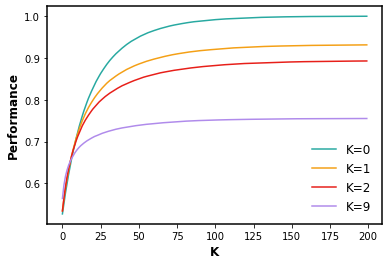

In [13]:
# Assess the time dimension
x = range(len(t40_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, t40_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, t40_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, t40_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, t40_performance_time[-1], "k-", label="K=9", color=morandi_purple)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\T40_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

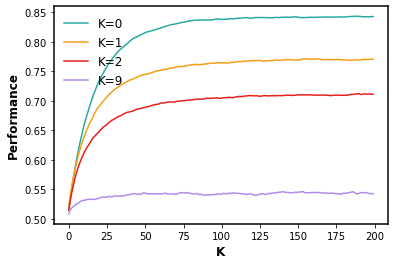

In [14]:
# Assess the time dimension
x = range(len(t30_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, t30_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, t30_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, t30_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, t30_performance_time[-1], "k-", label="K=9", color=morandi_purple)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\T30_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

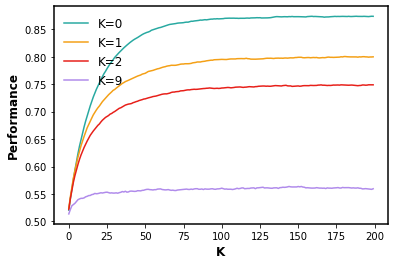

In [15]:
# Assess the time dimension
x = range(len(t32_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, t32_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, t32_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, t32_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, t32_performance_time[-1], "k-", label="K=9", color=morandi_purple)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\T32_performance_time.png", transparent=True, dpi=300)
plt.show()
# plt.clf()